# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load Iris Dataset

In [2]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=features)
df["class"] = iris["target"]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


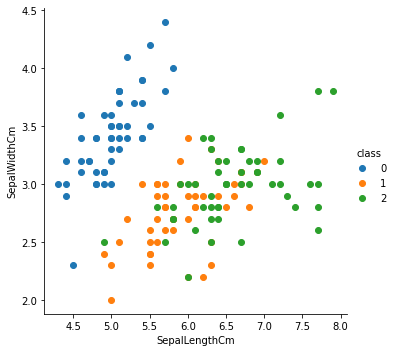

In [3]:
sns.FacetGrid(df, hue="class", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

In [4]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

# Data Splitting

In [5]:
X = df[features].values
Y = df["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Data Modeling

In [6]:
neighbors = 5

In [7]:
knn = KNeighborsClassifier(n_neighbors=neighbors)

# Model Training and Prediction

In [8]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [9]:
Y_pred = knn.predict(X_test)

In [10]:
X_test = pd.DataFrame(X_test, columns=features)
Y_test = pd.DataFrame(Y_test, columns=["class"])

pd.concat([X_test, Y_test, pd.Series(Y_pred, name="Predicted", index=X_test.index)], ignore_index=False, axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class,Predicted
0,4.9,2.4,3.3,1.0,1,1
1,4.7,3.2,1.6,0.2,0,0
2,4.6,3.4,1.4,0.3,0,0
3,5.4,3.0,4.5,1.5,1,1
4,5.6,3.0,4.1,1.3,1,1
5,6.5,3.0,5.2,2.0,2,2
6,7.1,3.0,5.9,2.1,2,2
7,5.4,3.4,1.7,0.2,0,0
8,6.2,2.2,4.5,1.5,1,1
9,6.4,3.2,4.5,1.5,1,1


In [11]:
print("Test set score: {:.2f}".format(knn.score(X_test, Y_test)))

Test set score: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
